In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
df = pd.read_csv('/content/Card_Transaction_Dataset.csv')

X = df.drop(columns=["IsFraud", "TransactionID", "CardID", "Timestamp"])
X = pd.get_dummies(X, columns=["UserCountry", "TransactionCountry", "TransactionType"], drop_first=True)
y = df["IsFraud"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train)

# prediction
train_scores = iso_forest.decision_function(X_train)
val_scores = iso_forest.decision_function(X_val)
test_scores = iso_forest.decision_function(X_test)

train_preds = iso_forest.predict(X_train)
val_preds = iso_forest.predict(X_val)
test_preds = iso_forest.predict(X_test)

# prediction을 이진수로 변환(1 == 이상값, 0 == 정상)
train_preds = np.where(train_preds == -1, 1, 0)
val_preds = np.where(val_preds == -1, 1, 0)
test_preds = np.where(test_preds == -1, 1, 0)

train_acc = accuracy_score(y_train, train_preds)
val_acc = accuracy_score(y_val, val_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9375
Validation Accuracy: 0.9400
Test Accuracy: 0.9600


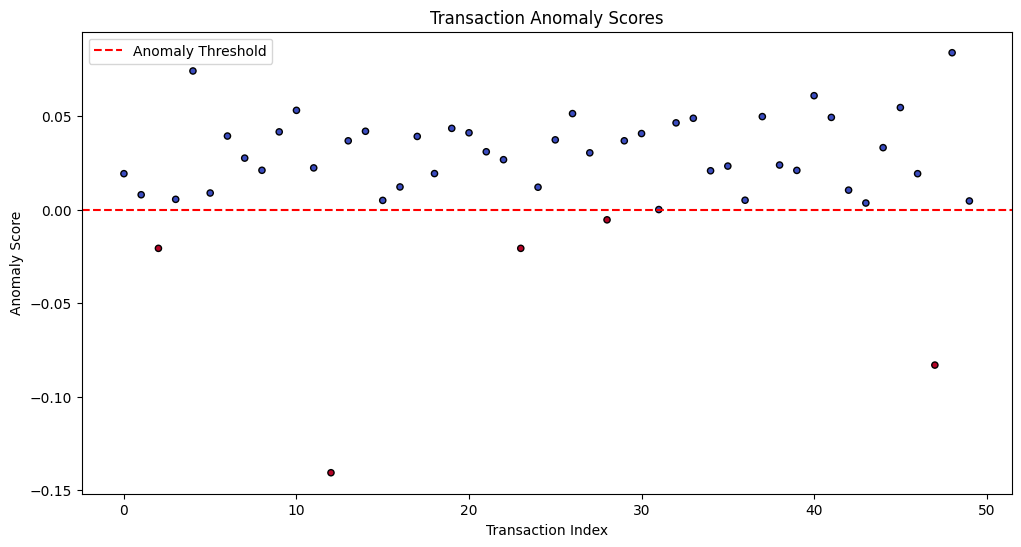

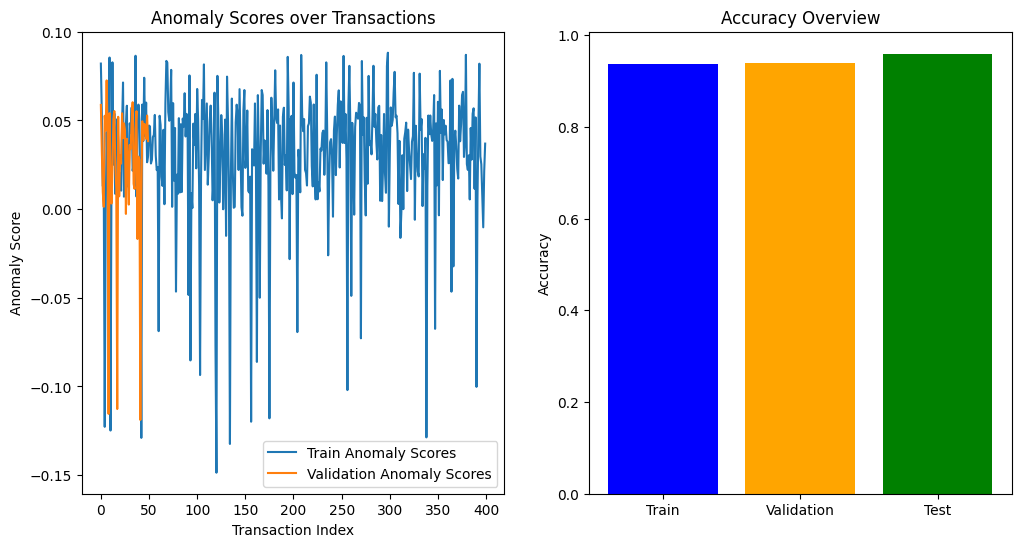

In [ ]:
# 시각화

plt.figure(figsize=(12, 6))

plt.scatter(range(len(test_scores)), test_scores, c=test_preds, cmap='coolwarm', edgecolor='k', s=20)
plt.axhline(y=0, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Transaction Anomaly Scores')
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_scores, label='Train Anomaly Scores')
plt.plot(val_scores, label='Validation Anomaly Scores')
plt.title('Anomaly Scores over Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(["Train", "Validation", "Test"], [train_acc, val_acc, test_acc], color=['blue', 'orange', 'green'])
plt.title('Accuracy Overview')
plt.ylabel('Accuracy')
plt.show()
